In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the data
tt_iterative = pd.read_csv("data/tt_iterative.csv").rename(columns={"Unnamed: 0": "id"}).set_index("id")
tt_knn = pd.read_csv("data/tt_knn.csv").rename(columns={"Unnamed: 0": "id"}).set_index("id")
tt_mean= pd.read_csv("data/tt_mean.csv").rename(columns={"Unnamed: 0": "id"}).set_index("id")

In [3]:
train_iterative = tt_iterative.iloc[:40000] 
train_knn = tt_knn.iloc[:40000] 
train_mean = tt_mean.iloc[:40000] 

In [4]:
test_iterative = tt_iterative.iloc[40000:] 
test_knn = tt_knn.iloc[40000:] 
test_mean = tt_mean.iloc[40000:] 

# Exploratory Data Analysis

First plot of the data, to give me an idea how it is distributed

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

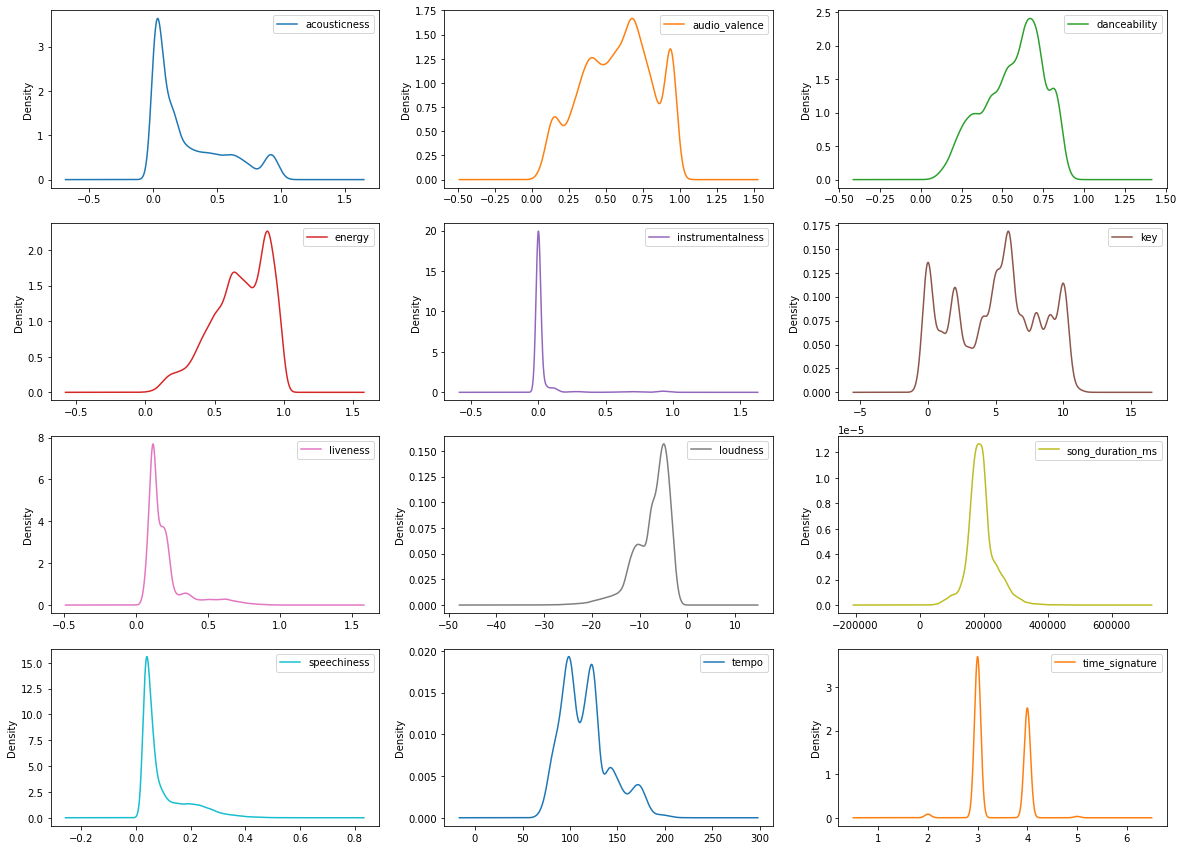

In [5]:
(train_iterative[train_iterative.columns.difference(["audio_mode", "song_popularity"])]
.plot(kind="density", subplots=True, layout=(4,3), figsize=(20,15), sharex=False))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

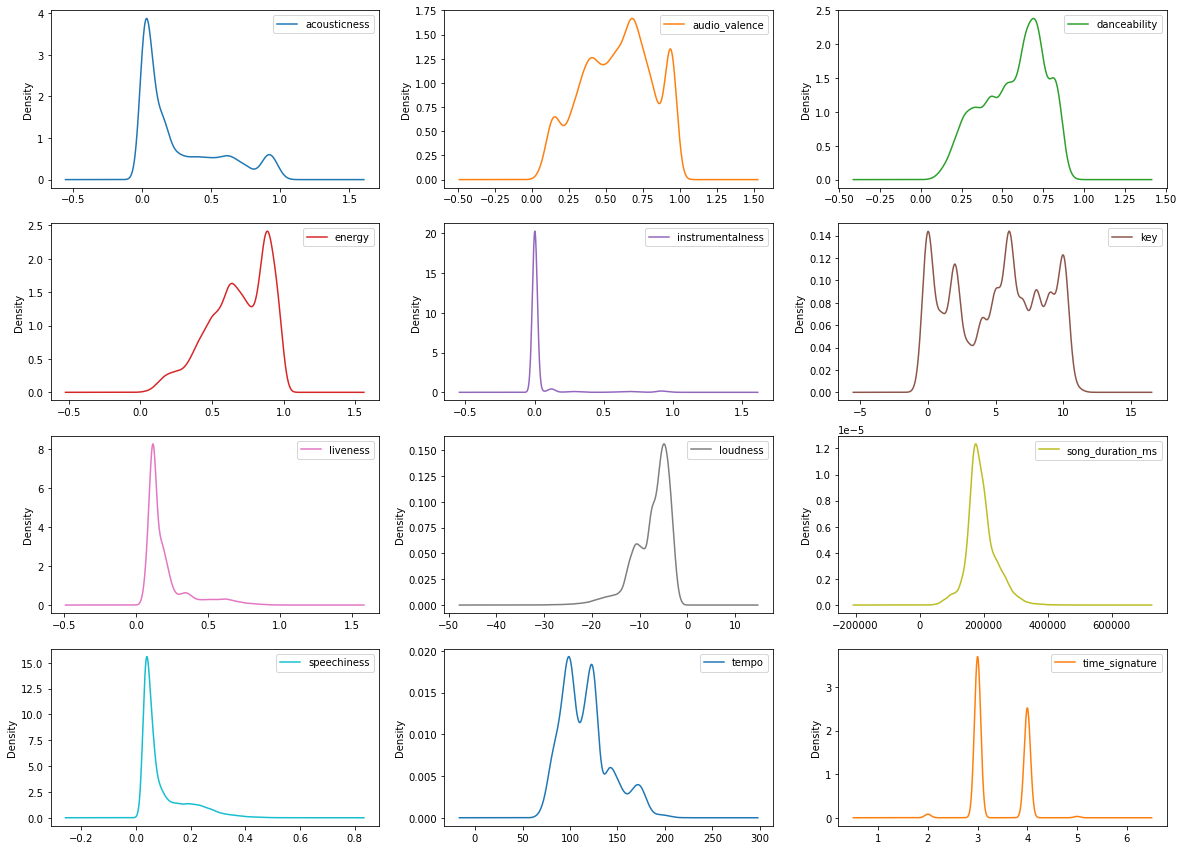

In [6]:
(train_knn[train_knn.columns.difference(["audio_mode", "song_popularity"])]
.plot(kind="density", subplots=True, layout=(4,3), figsize=(20,15), sharex=False))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

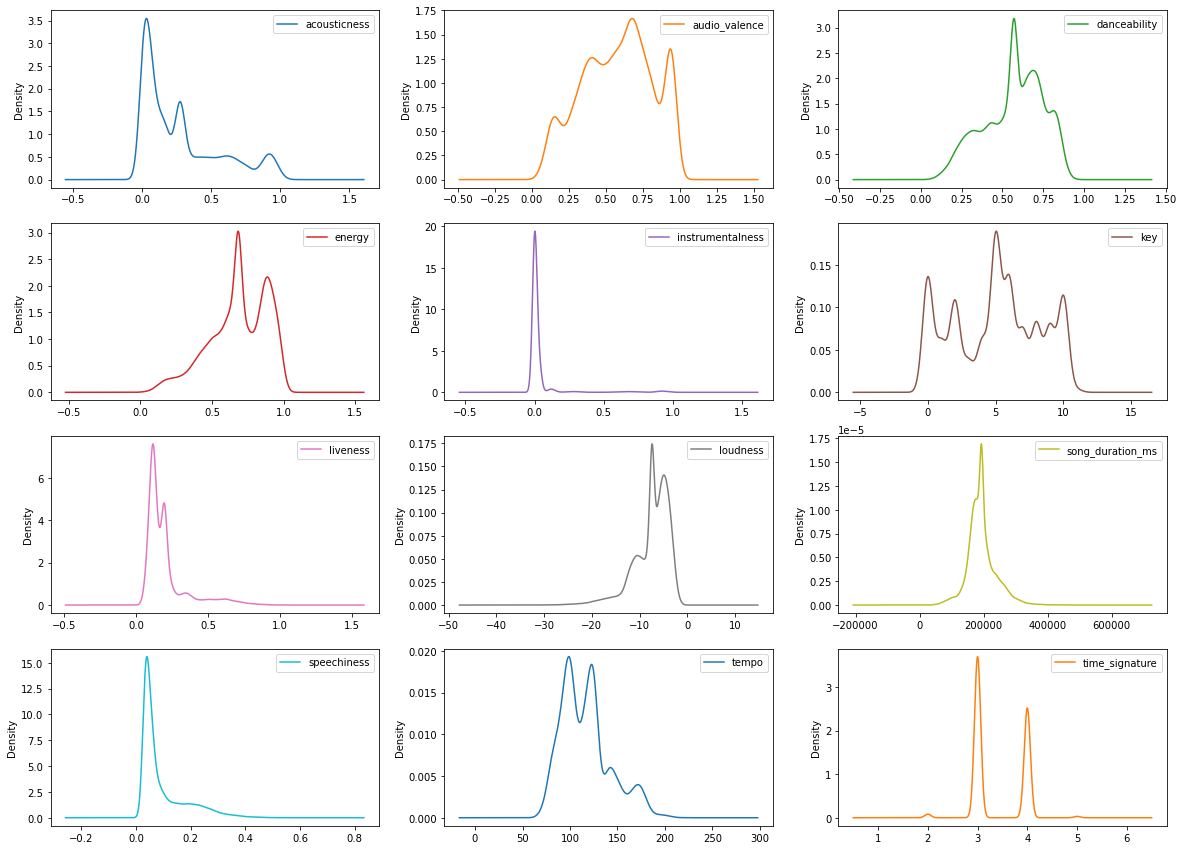

In [7]:
(train_mean[train_mean.columns.difference(["audio_mode", "song_popularity"])]
.plot(kind="density", subplots=True, layout=(4,3), figsize=(20,15), sharex=False))

Some things to note:
- _time signature_ is categorical
- _key_ is also categorical
- _instrumentalness_ and _speechiness is very skewed

__Handling categorical visualizations__

<AxesSubplot:title={'center':'Time signature'}>

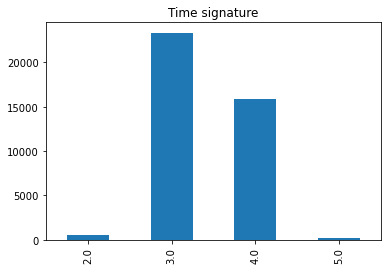

In [8]:
(train_iterative["time_signature"]
.value_counts()
.sort_index()
.plot(kind="bar", title="Time signature"))

<AxesSubplot:title={'center':'Key'}>

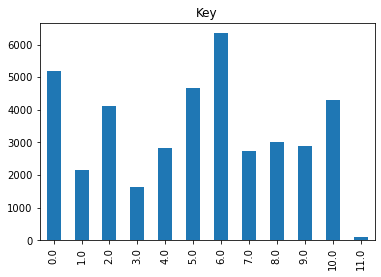

In [9]:
(train_iterative["key"]
.round(decimals=0)
.value_counts()
.sort_index()
.plot(kind="bar", title="Key"))

__Skewed visualizations__

<AxesSubplot:title={'center':'values ^82'}, ylabel='Density'>

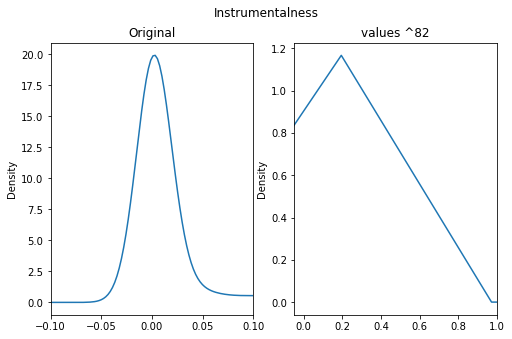

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(8,5))
fig.suptitle("Instrumentalness")

train_iterative["instrumentalness"] \
    .plot(kind="density", ax=axs[0], xlim=[-0.1, 0.1], title="Original")

train_iterative["instrumentalness"] \
    .apply(lambda x: x**82).plot(kind="density", ax=axs[1], xlim=[-0.05, 1], title="values ^82")

<AxesSubplot:title={'center':'values *11'}, ylabel='Density'>

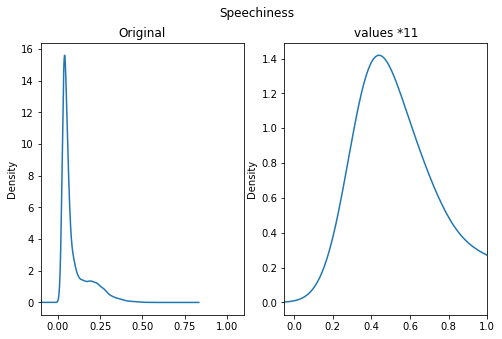

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(8,5))
fig.suptitle("Speechiness")

train_iterative["speechiness"] \
    .plot(kind="density", ax=axs[0], xlim=[-0.1, 1.1], title="Original")

train_iterative["speechiness"] \
    .apply(lambda x: x*11).plot(kind="density", ax=axs[1], xlim=[-0.05, 1], title="values *11")

<AxesSubplot:title={'center':'values *3.5'}, ylabel='Density'>

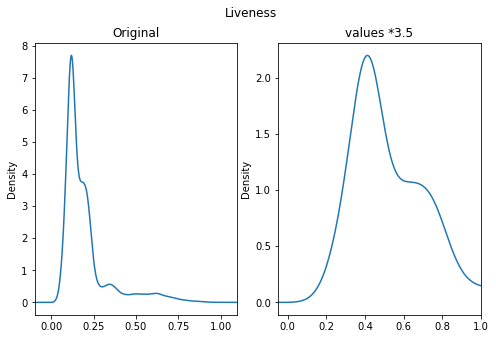

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(8,5))
fig.suptitle("Liveness")

train_iterative["liveness"] \
    .plot(kind="density", ax=axs[0], xlim=[-0.1, 1.1], title="Original")

train_iterative["liveness"] \
    .apply(lambda x: x*3.5).plot(kind="density", ax=axs[1], xlim=[-0.05, 1], title="values *3.5")

__Normalizing__

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

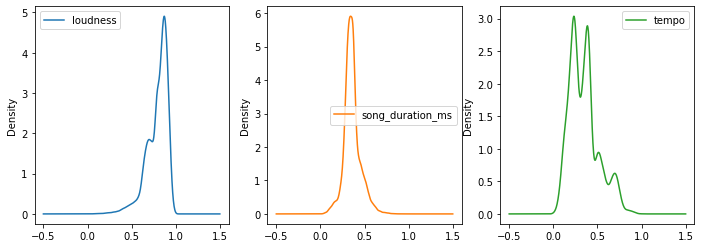

In [13]:
to_normalize = ["loudness", "song_duration_ms", "tempo"]
sub_df = train_iterative[to_normalize]
normalized_df=(sub_df-sub_df.min())/(sub_df.max()-sub_df.min())
normalized_df.plot(kind="density", subplots=True, layout=(1,4), figsize=(16,4))

<AxesSubplot:title={'center':'Loudness, values ^3'}, ylabel='Density'>

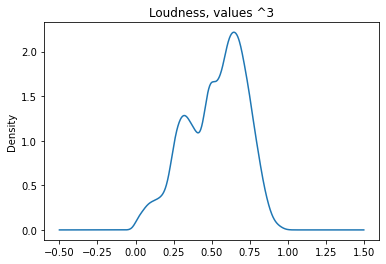

In [14]:
normalized_df["loudness"].apply(lambda x: x**3).plot(kind="density", title="Loudness, values ^3")

### Recalling all the operations and explorations

In [15]:
train_iterative = tt_iterative.iloc[:40000] 
def processing_final_dataset(df):
    df["instrumentalness"] = df["instrumentalness"].apply(lambda x: x**82)
    df["speechiness"] = df["speechiness"].apply(lambda x: x*11)
    df["liveness"] = df["liveness"].apply(lambda x: x*4)
    df[to_normalize] = df[to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    df["loudness"] = df["loudness"].apply(lambda x: x**3)
    return df
train_iterative2 = processing_final_dataset(train_iterative)

/tmp/ipykernel_2570/1720230059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["instrumentalness"] = df["instrumentalness"].apply(lambda x: x**82)
/tmp/ipykernel_2570/1720230059.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["speechiness"] = df["speechiness"].apply(lambda x: x*11)
/tmp/ipykernel_2570/1720230059.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

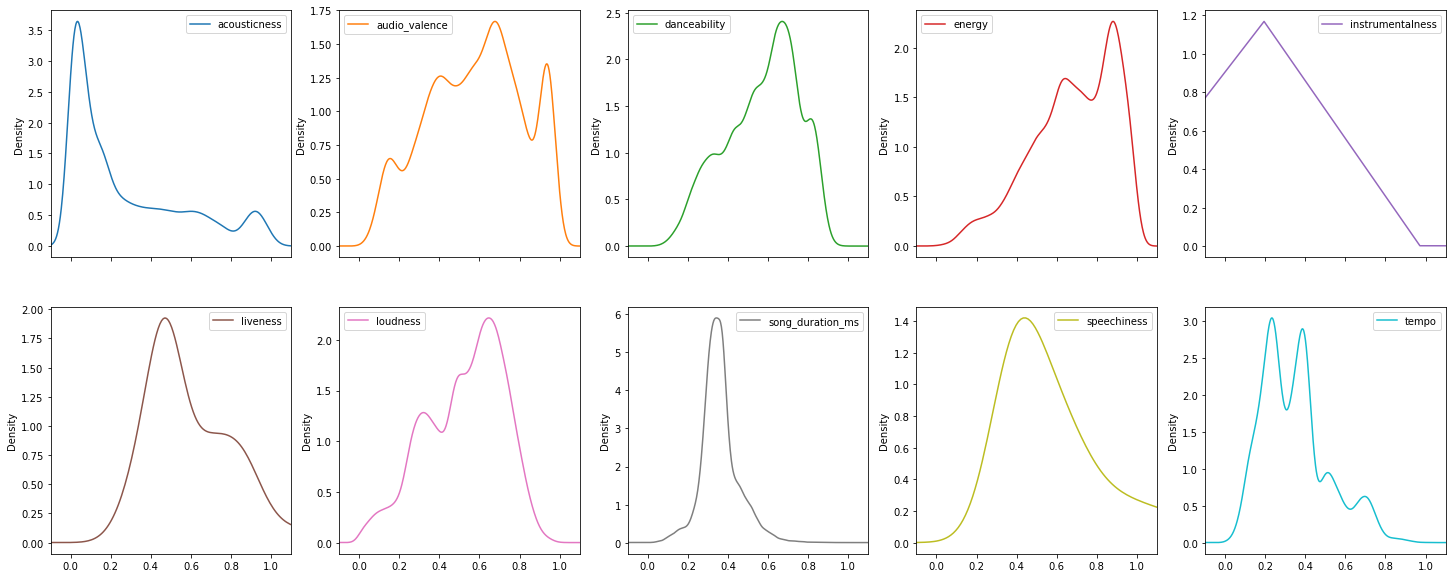

In [18]:
(train_iterative2[train_iterative2.columns.difference(["audio_mode", "key", "time_signature"])]
.plot(kind="density", subplots=True, layout=(2,5), figsize=(25,10), xlim=[-0.1, 1.1], sharex=True))

In [23]:

corr = train_iterative2.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
corr.style.background_gradient(cmap="coolwarm").highlight_null(null_color='#f1f1f1')

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_duration_ms,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
acousticness,-0.181783,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
danceability,-0.067490,-0.099801,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
energy,0.162574,-0.603430,0.105094,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
instrumentalness,-0.024204,0.019748,-0.011083,-0.017981,nan,nan,nan,nan,nan,nan,nan,nan,nan
key,0.021066,-0.201953,0.132028,0.224800,-0.010219,nan,nan,nan,nan,nan,nan,nan,nan
liveness,0.036623,-0.134975,0.049382,0.166650,-0.003721,0.085894,nan,nan,nan,nan,nan,nan,nan
loudness,0.151416,-0.556151,0.179270,0.690453,-0.020680,0.221420,0.162393,nan,nan,nan,nan,nan,nan
audio_mode,-0.018635,0.069466,0.030502,-0.097830,-0.000127,-0.038030,-0.014359,-0.087495,nan,nan,nan,nan,nan
speechiness,-0.000603,-0.133747,0.186171,0.121187,-0.005431,0.108473,0.080529,0.155425,0.019790,nan,nan,nan,nan


We can observe our values are better distributed than before, so, lets import the new data for the models.

In [24]:
tt_iterative_processed = processing_final_dataset(tt_iterative)
tt_knn_processed = processing_final_dataset(tt_knn)
tt_mean_processed = processing_final_dataset(tt_mean)

In [25]:
tt_iterative_processed

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
id,,,,,,,,,,,,,
0,8.961802e-07,0.642286,0.856520,0.707073,0.000000e+00,10.0,3.428271,0.962622,0.0,9.990920,0.002866,4.0,0.734642
1,8.194433e-07,0.054866,0.733289,0.835545,0.000000e+00,8.0,6.982849,0.965161,1.0,15.410378,0.001211,3.0,0.711531
2,8.015687e-07,0.161850,0.188387,0.783524,0.000000e+00,5.0,2.727979,0.967106,0.0,6.326075,0.003470,3.0,0.425536
3,1.072721e-06,0.488660,0.585234,0.552685,0.000000e+00,0.0,1.516882,0.949046,0.0,4.309723,0.001983,3.0,0.453597
4,6.712358e-07,0.493017,0.641740,0.740982,0.000000e+00,10.0,1.518257,0.984188,0.0,6.140282,0.001781,4.0,0.741311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4.374105e-01,0.083936,0.823252,0.442246,9.994533e-208,1.0,0.495682,0.323580,1.0,0.452878,0.459347,4.0,0.784104
49996,4.867665e-01,0.105279,0.683743,0.848627,1.139418e-223,6.0,0.426088,0.526507,0.0,0.369660,0.485923,4.0,0.850754
49997,4.200884e-01,0.753472,0.783947,0.498261,2.689916e-72,6.0,0.352589,0.200389,1.0,0.324788,0.556700,4.0,0.482961


In [29]:

tt_iterative_processed.to_csv("data/data_to_models/tt_ite.csv")
tt_knn_processed.to_csv("data/data_to_models/tt_knn.csv")
tt_mean_processed.to_csv("data/data_to_models/tt_mean.csv")